## 1. Libraries

To start, let's load those libraries that we need

In [2]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
import random
import tensorflow as tf

**Let's see the train and test**

In [3]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



# x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 13s 0us/step


In [4]:
y_train_label = y_train

In [5]:
cifar10
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [6]:

print("Shape X train:", x_train.shape)
print("Shape Y train:", y_train.shape)


print("Shape X test:", x_test.shape)
print("Shape Y test:", y_test.shape)


print("Shape X val:", x_val.shape)
print("Shape Y val:", y_val.shape)

Shape X train: (40000, 32, 32, 3)
Shape Y train: (40000, 1)
Shape X test: (10000, 32, 32, 3)
Shape Y test: (10000, 1)
Shape X val: (10000, 32, 32, 3)
Shape Y val: (10000, 1)


In [7]:

min_value_org = np.min(x_train)
max_value_org = np.max(x_train)

print("Min value:", min_value_org)
print("Max value:", max_value_org)

Min value: 0
Max value: 255


See whether each category has equal number of images

<Axes: >

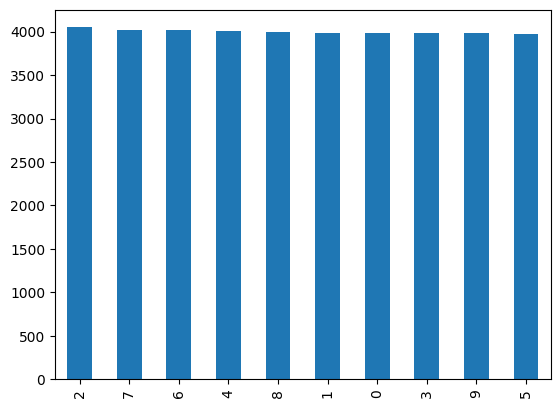

In [8]:

df_train = pd.DataFrame(y_train, columns=['labels'])
df_train['labels'].value_counts().plot.bar()

All of the labels have approximately equal number of items for each label

In [9]:
pivot_table = df_train.pivot_table(index='labels', aggfunc='size')
display(pivot_table)

labels
0    3986
1    3986
2    4048
3    3984
4    4003
5    3975
6    4020
7    4023
8    3997
9    3978
dtype: int64

They seem approximately the same number of samples in each label

In [10]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


In [11]:
y_train_label = y_train


In [12]:
K.clear_session()
model_7_dropout_complex_2denseconv128_2convto32=0

In [13]:
# make randomness under control
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [11]:

# Define the data augmentation layer, Starting with simple horizontal flip
data_augmentation =ks.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32, 32, 3)),

])
# Rescale layer
rescale = ks.Sequential([
  layers.Rescaling(1./255)
])


In [12]:
model_7_dropout_complex_2denseconv128_2convto32 = ks.Sequential()
 # Add the preprocessing layers you created earlier.
rescale,
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.RandomFlip(mode="horizontal", input_shape=(32,32,3)))
# Main Model
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.2))

model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.3))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.4))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Flatten())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(128, activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.5))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(10, activation='softmax'))

In [13]:
model_7_dropout_complex_2denseconv128_2convto32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)       

We can see that a layer added as randomflip without any parameters. it just acts as an image transformer and change the input to make the same images as different as possible to enable the model to detect complicated patterns

## 3. Optimizer, error function


In [55]:
model_7_dropout_complex_2denseconv128_2convto32.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [15]:
# Increases the callbacks' patience as I observed the model learns for couple of epocs and performs better in test data not on validation dataset and then improves in validation dataset, so when we apply data augmentation we should give more patience to the callback to be able
# to detect overfitting correctly as well as give the model enough time to train
callback_loss = EarlyStopping(monitor="val_loss", patience=15)
callback_accuracy = EarlyStopping(monitor="val_accuracy", patience=20)

## 5. Training
 Now we can train the model. We put the scaling and horizontal flip augmentation inside the model layers. Let's see the improvement

In [ ]:
t = time.perf_counter()

In [ ]:
# I put epochs to 100 as 20 was so soon and the model hasn't completed the training by then
history =  model_7_dropout_complex_2denseconv128_2convto32.fit(x_train, y_train, epochs=100,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss]

)

Epoch 1/100
625/625 [==============================] - 12s 12ms/step - loss: 1.8960 - accuracy: 0.3504 - val_loss: 1.3596 - val_accuracy: 0.5150
Epoch 2/100
625/625 [==============================] - 7s 11ms/step - loss: 1.2996 - accuracy: 0.5368 - val_loss: 1.1204 - val_accuracy: 0.6012
Epoch 3/100
625/625 [==============================] - 7s 11ms/step - loss: 1.1065 - accuracy: 0.6090 - val_loss: 1.0038 - val_accuracy: 0.6492
Epoch 4/100
625/625 [==============================] - 7s 12ms/step - loss: 0.9761 - accuracy: 0.6604 - val_loss: 0.8252 - val_accuracy: 0.7046
Epoch 5/100
625/625 [==============================] - 7s 11ms/step - loss: 0.8960 - accuracy: 0.6920 - val_loss: 0.8170 - val_accuracy: 0.7087
Epoch 6/100
625/625 [==============================] - 7s 12ms/step - loss: 0.8312 - accuracy: 0.7143 - val_loss: 0.7400 - val_accuracy: 0.7366
Epoch 7/100
625/625 [==============================] - 7s 11ms/step - loss: 0.7804 - accuracy: 0.7320 - val_loss: 0.7838 - val_accuracy

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:08:07.454962


## 6. We evaluate the results

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [ ]:
model_accuracies = {}

In [ ]:
_, acc =model_7_dropout_complex_2denseconv128_2convto32.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Conv_dense_aug'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)



> 85.860
[0.85860002]


In [ ]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
        'Add learning scheduler',
        'Change the first convolution set to 32',
        'Data Augmentation _random_Flip_on best model'
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990,0.8159,0.8228,0.836,0.8586]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270
5  Dense layer more dropouts and change the place...    0.7990
6  Add two additional convolution layer of 128 wi...    0.8159
7                             Add learning scheduler    0.8228
8             Change the first convolution set to 32    0.8360
9       Data Augmentation _random_Flip_on best model    0.8586


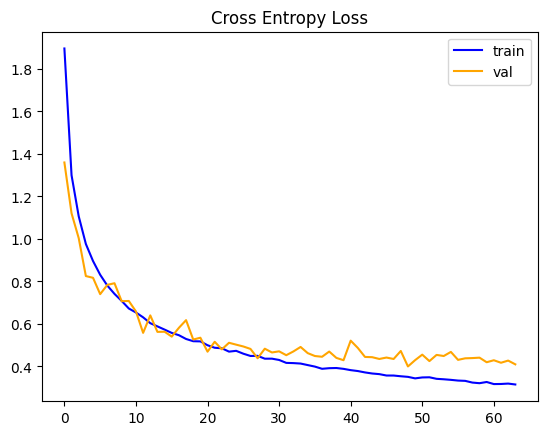

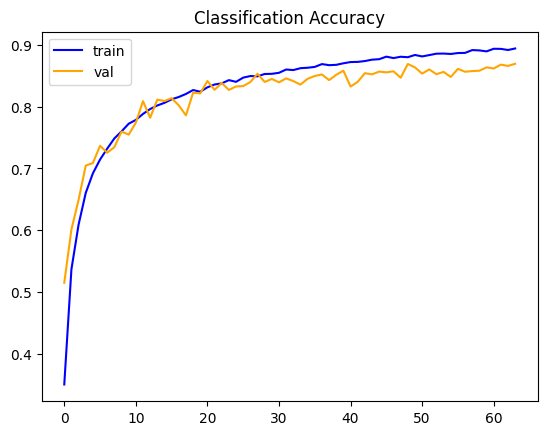

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

It seems the simple random flip works well as augmented layer. The performance increased to 85.86% and the model seems stable as we set the early stopper.at the beginning the model learns patterns that generalize well as the performance on validation seems better till epoch 27-26 then it starts to becoome a bit worse but still reasonable in the accuracy on validation set and stops on epoch 60 with around 89.48% on train set and 86.93% on validation set. The test result was worse and it seems that this little overfitting effects the result. Let's visualize the first 9 predictions on test set

In [ ]:
predictions = model_7_dropout_complex_2denseconv128_2convto32.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [51]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


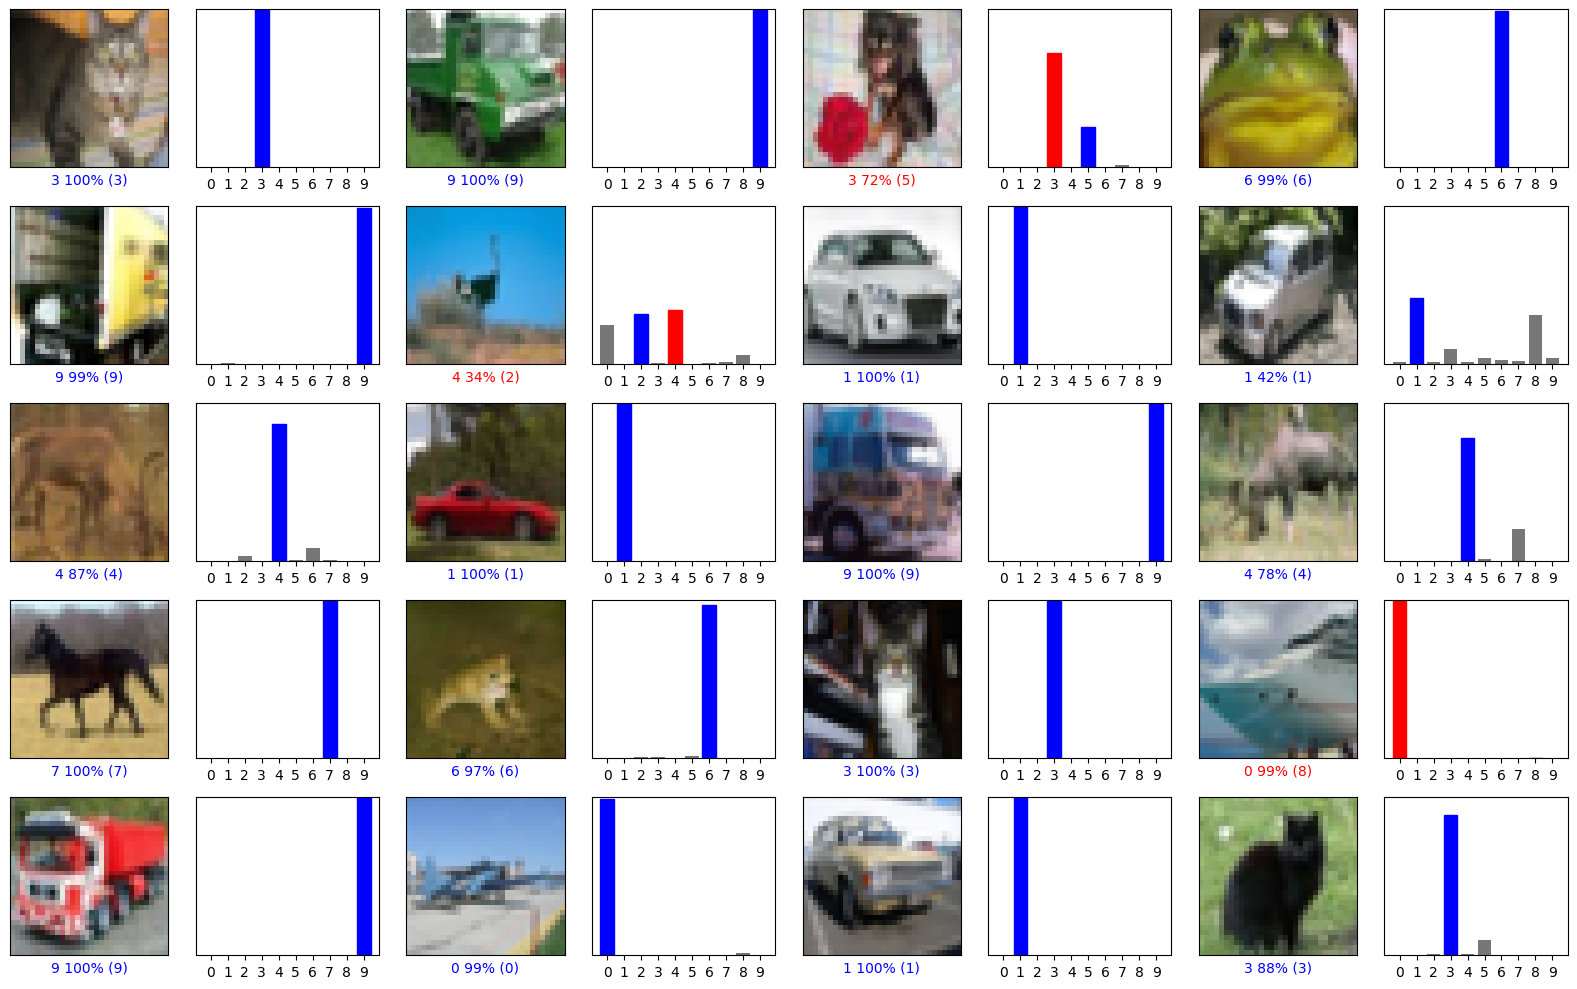

In [56]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

We can see in the first 20 test images we only have 3 errors for this model with data augmentation of random flip. Let's Try with another augmentation.

### Model 7 Augmentation 2: Horizontal flip + zoom

Using a seed for randomness can help make the model's performance more stable between runs. This is particularly useful when we have randomness in applying augmentation and  dropout layers.

In [29]:

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

Let's build the model with randomflip, scaling and random zoom as layers of augmentation inserted in the model

In [28]:
K.clear_session()
model_7_dropout_complex_2denseconv128_2convto32=0
# Define the data augmentation layer
data_augmentation = ks.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomZoom(0.1), # added zoom
])

In [31]:
# let's define learning scheduler as we added two augmentation factors the model is more likely to become overfitted
def lr_schedule(epoch, lr):
    if epoch <41:
        return lr
    elif epoch < 61:
        return lr * 0.1
    else:
        return lr * 0.01

lr_scheduler = ks.callbacks.LearningRateScheduler(lr_schedule)

In [30]:
model_7_dropout_complex_2denseconv128_2convto32 = ks.Sequential()
# Add the data augmentation layer as the first layer
model_7_dropout_complex_2denseconv128_2convto32.add(data_augmentation)

# Main Model
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.2))

model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.3))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.4))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Flatten())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(128, activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.5))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(10, activation='softmax'))

In [32]:
model_7_dropout_complex_2denseconv128_2convto32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)       

Optimizer is the same as the base model Adam
for classifying images we are going to use Sparse Categorical Crosstentropy
and the matrics we are going to evaluate our model is accuracy

In [33]:
model_7_dropout_complex_2denseconv128_2convto32.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

We have the same train and evaluation and test sets. Let's load them


Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


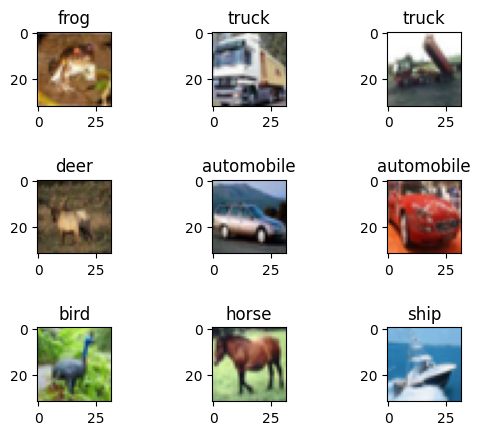

In [53]:
# Lets paint a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [35]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


**Training**
We can start training the model! Be careful, we have to train against the data converted to the format expected by the Convolution.

We will start with 30 epocs, that is, 30 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 64.
First, I define the callback and early stopping then I am going to train the model.


In [39]:
callback_loss = EarlyStopping(monitor='val_loss', patience=15)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=20)

### Train the model

In [40]:
t = time.perf_counter()

In [41]:
history =model_7_dropout_complex_2denseconv128_2convto32.fit(x_train, y_train, epochs=100,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[lr_scheduler, callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/100
625/625 [==============================] - 13s 13ms/step - loss: 1.8781 - accuracy: 0.3581 - val_loss: 1.3768 - val_accuracy: 0.4935 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 8s 13ms/step - loss: 1.3288 - accuracy: 0.5278 - val_loss: 1.3781 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 7s 12ms/step - loss: 1.1409 - accuracy: 0.5966 - val_loss: 1.2491 - val_accuracy: 0.5636 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 8s 13ms/step - loss: 1.0292 - accuracy: 0.6386 - val_loss: 0.8824 - val_accuracy: 0.6893 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 8s 13ms/step - loss: 0.9401 - accuracy: 0.6746 - val_loss: 0.8213 - val_accuracy: 0.7201 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 10s 17ms/step - loss: 0.8675 - accuracy: 0.7009 - val_loss: 0.7735 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 1

We can see with zoom added the model stops 2 epochs earlier than just horizontal flip which was trained till epoch64. That's because of adding the learning scheduler as well as it makes our training and validation accuracies closer together and with the test set. After 41 epochs and 61 epochs respectively the learning rate divided by 0.1 and 0.01 on each epoch.

In [42]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:08:34.613979


In [43]:
model_accuracies = {}
_, acc =model_7_dropout_complex_2denseconv128_2convto32.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Add One layer convolution + Early Stopper'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 85.320
[0.85320002]


We can see the accuracy is less than the model with only horizontal flip augmentation. So zoom may be either too much or not well suited our image sets.

In [44]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
        'Add learning scheduler',
        'Change the first convolution set to 32',
        'Data Augmentation _random_Flip_on best model',
        'Learning Scheduler and zoom'
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990,0.8159,0.8228,0.836,0.8586,0.8532]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                           Model Name  Accuracy
0                                          Base Model    0.5962
1                   Add Convolution and early stopper    0.6513
2                    Add dropout and batch normalizer    0.6892
3   Added two convolution layers on top of dropout...    0.7170
4                      Make all convolution layers 64    0.7270
5   Dense layer more dropouts and change the place...    0.7990
6   Add two additional convolution layer of 128 wi...    0.8159
7                              Add learning scheduler    0.8228
8              Change the first convolution set to 32    0.8360
9        Data Augmentation _random_Flip_on best model    0.8586
10                        Learning Scheduler and zoom    0.8532


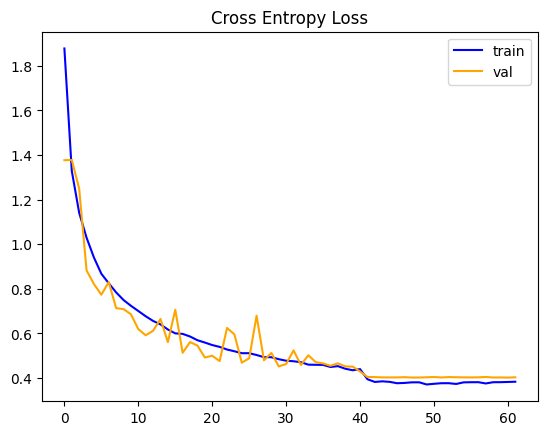

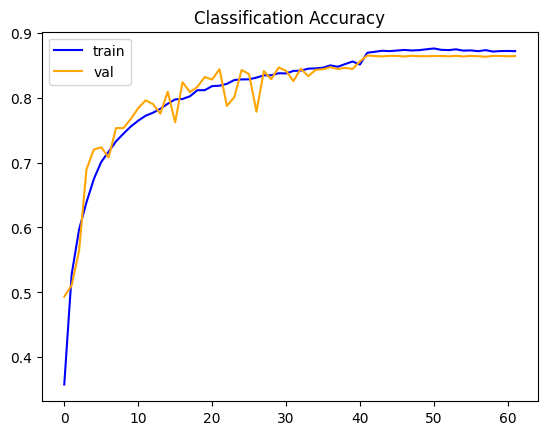

In [52]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

Adding zoom beside the horizontal flip,as we can see, the accuracy is less than the previous model however because of scheduler it is more stable. So let's keep horizontal flip and try the brightness later.

In [49]:
predictions = model_7_dropout_complex_2denseconv128_2convto32.predict(x_test)

313/313 [==============================] - 1s 3ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


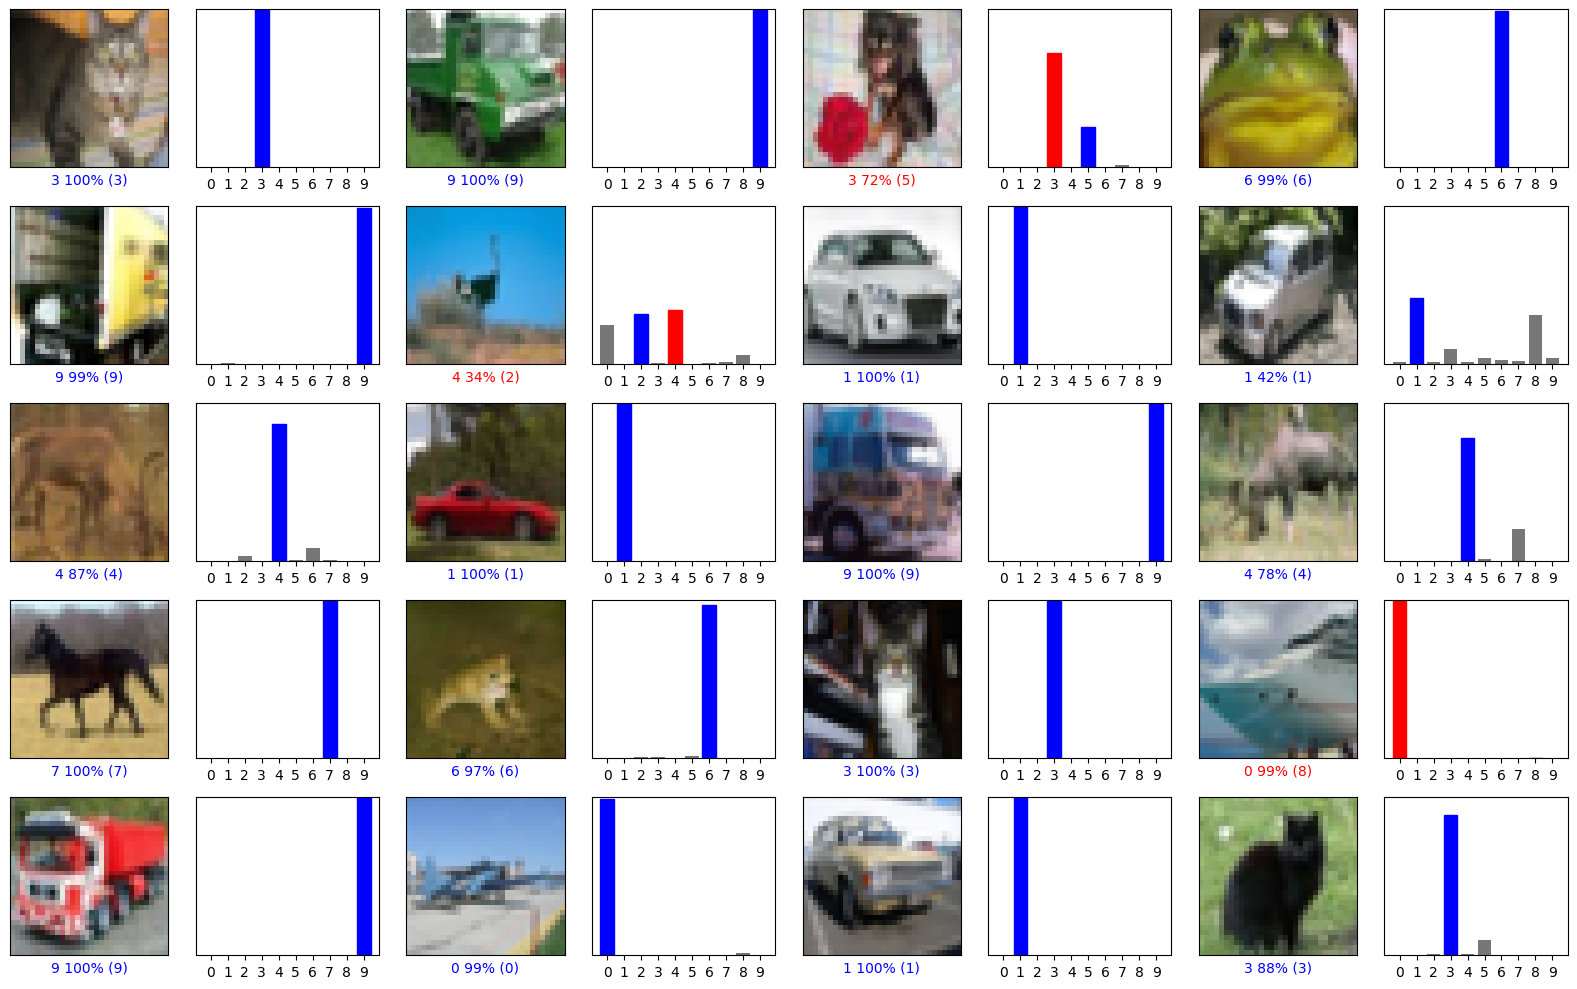

In [57]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

In the first 20 images on the test set the performance hasn't changed. We can see the acucracy reduced from 85.86% to
85.32%. So zoom may not work well. Let's see how it changes when I add brightness instead of zoom.

**Model 7: Brightness augmentation and horizontal random flip**

In [34]:
K.clear_session()
model_7_dropout_complex_2denseconv128_2convto32=0
# Define the data augmentation layer
data_augmentation = ks.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomContrast(0.1),  # added contrast
])

In [35]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [36]:
model_7_dropout_complex_2denseconv128_2convto32 = ks.Sequential()
# Add the data augmentation layer as the first layer
model_7_dropout_complex_2denseconv128_2convto32.add(data_augmentation)

# Main Model
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.2))

model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.3))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.4))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Flatten())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(128, activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.5))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(10, activation='softmax'))

In [37]:
model_7_dropout_complex_2denseconv128_2convto32.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [38]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [39]:
callback_loss = EarlyStopping(monitor='val_loss', patience=20)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=25)

I found that the learning should reduce a bit less agressively than the previous learning scheduler so I put it the default learning rate for 80 epochs and then reduce by 0.1 afterwards.

In [40]:
def lr_schedule(epoch, lr):
    if epoch < 80:
        return lr
    else:
        return lr * 0.1

lr_scheduler = ks.callbacks.LearningRateScheduler(lr_schedule)

In [41]:
t = time.perf_counter()

In [42]:
history =model_7_dropout_complex_2denseconv128_2convto32.fit(x_train, y_train, epochs=100,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[lr_scheduler,callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/100
625/625 [==============================] - 12s 12ms/step - loss: 1.8507 - accuracy: 0.3658 - val_loss: 1.3914 - val_accuracy: 0.4966 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 7s 12ms/step - loss: 1.2732 - accuracy: 0.5452 - val_loss: 1.0723 - val_accuracy: 0.6110 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 7s 11ms/step - loss: 1.0819 - accuracy: 0.6211 - val_loss: 0.9174 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 0.9633 - accuracy: 0.6645 - val_loss: 0.8880 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 7s 12ms/step - loss: 0.8821 - accuracy: 0.6969 - val_loss: 0.7909 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 7s 11ms/step - loss: 0.8156 - accuracy: 0.7206 - val_loss: 0.7354 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 8s

As the model has a pattern of perform less for few epocs on validation then performs better than training in few next and as I saw these variations I adjust the learning rate scheduler so the accuracy in validation and training become closer on the last set of epochs and the validation value bacomes closer to the real test set evaluation. It seems that brightness, horizontal flip and the learning rate scheduler performas better than just horizontal flip or the flip together with the zoom. So let's see how the model performs on test set

In [43]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:16:19.075488


In [45]:
model_accuracies = {}
_, acc =model_7_dropout_complex_2denseconv128_2convto32.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Add One layer convolution + Early Stopper'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 86.840
[0.86839998]


We can see the accuracy raises from 85.32% to
86.840%.

In [52]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
        'Add learning scheduler',
        'Change the first convolution set to 32',
        'Data Augmentation _random_Flip_on best model',
        'Learning Scheduler, horizontal flip and zoom',
        'Learning Scheduler, horizontal flip and brightness'
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990,0.8159,0.8228,0.836,0.8586,0.8532,0.8684]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)


                                           Model Name  Accuracy
0                                          Base Model    0.5962
1                   Add Convolution and early stopper    0.6513
2                    Add dropout and batch normalizer    0.6892
3   Added two convolution layers on top of dropout...    0.7170
4                      Make all convolution layers 64    0.7270
5   Dense layer more dropouts and change the place...    0.7990
6   Add two additional convolution layer of 128 wi...    0.8159
7                              Add learning scheduler    0.8228
8              Change the first convolution set to 32    0.8360
9        Data Augmentation _random_Flip_on best model    0.8586
10       Learning Scheduler, horizontal flip and zoom    0.8532
11  Learning Scheduler, horizontal flip and bright...    0.8684


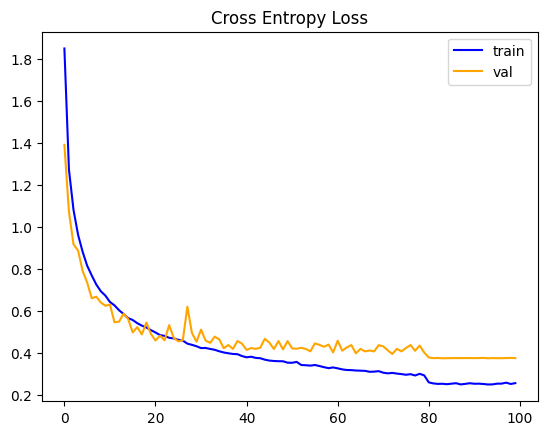

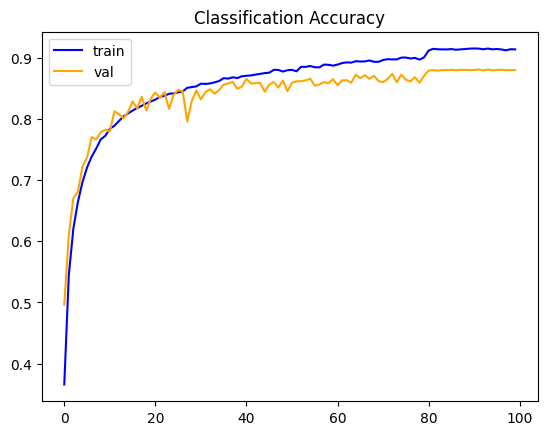

In [47]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

This model is generally a very good model as it becomes stable at the end with all the fluctuations at the beginning. Till the first 40 epochs on average the model improves it perfromance by training and after 40 epochs it's ability to generalize slowly decreased but still close enough to the training set performance that it performs well on test set. As we can see after epoch 80 the model becomes stable as we divide the learning rate by 0.1 on every epoch.

In [49]:
predictions = model_7_dropout_complex_2denseconv128_2convto32.predict(x_test)

313/313 [==============================] - 3s 7ms/step


In [53]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


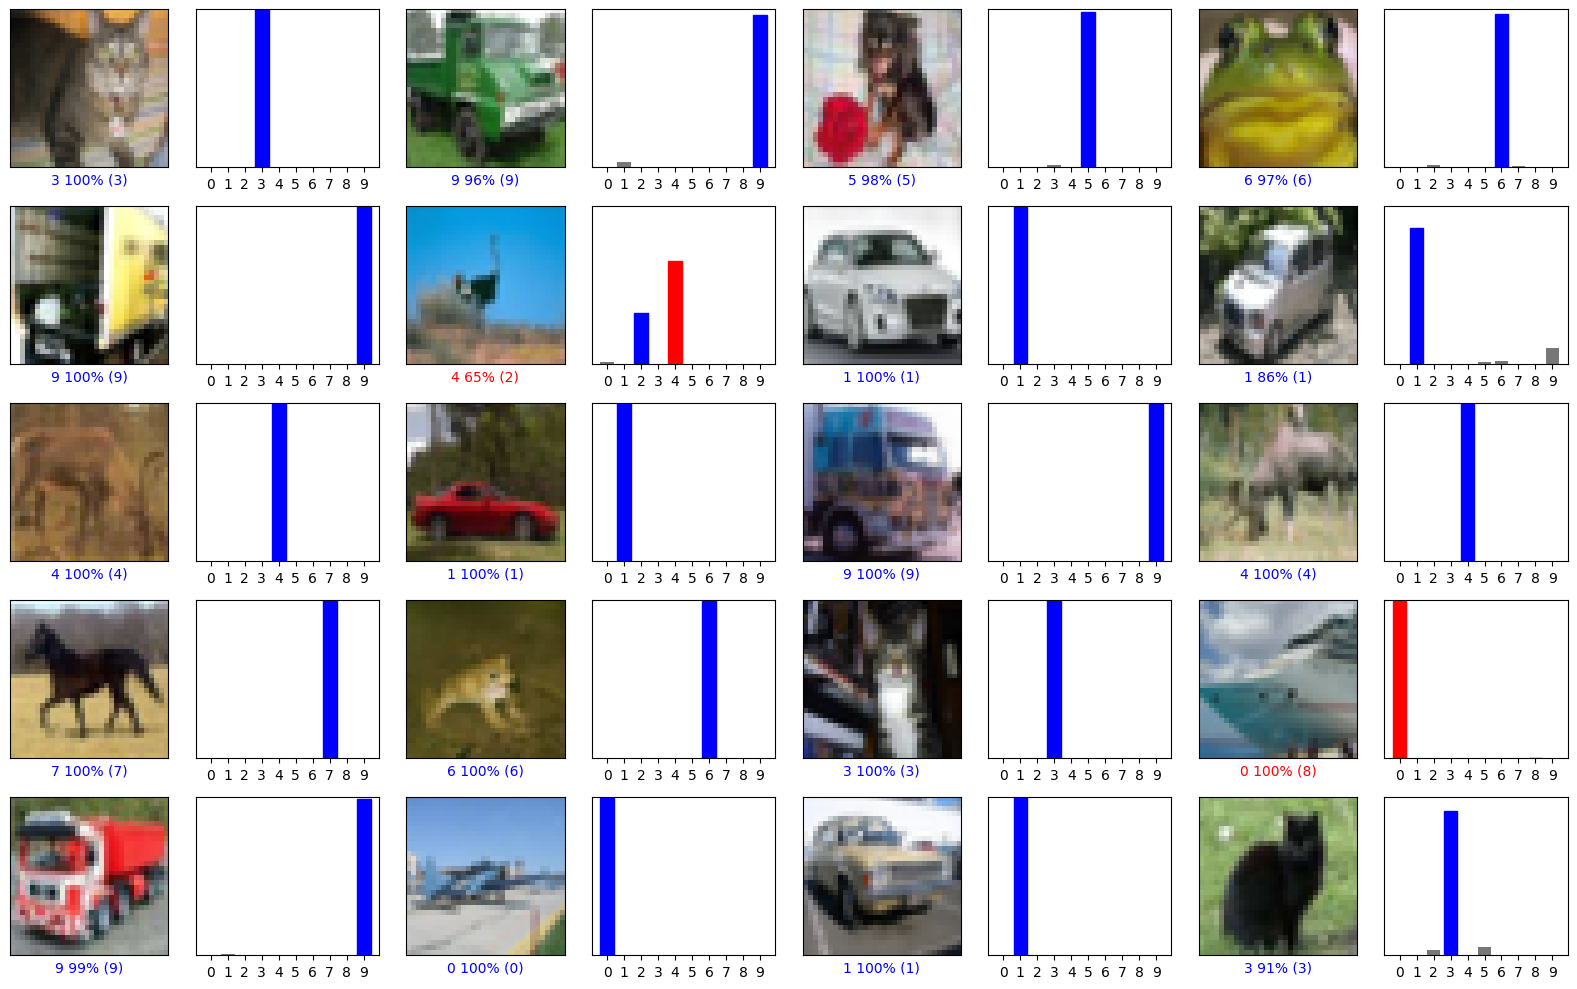

In [54]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

We can see this model performs best in the first 20 test images with two errors only.